In [10]:
import numpy as np
import matplotlib.pyplot as plt
import jax
import copy
import queue
from shower_sim_instrumented import simulator
from shower_sim_baseline import summary_metric, interact_prob

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Check it Runs

In [11]:
hits,active,history,scores,out_st = simulator(3.5)
print(scores, out_st['w'], hits.size, out_st['y']['hits'].size)

-9.576843 49.74283491693495 3440 3100


In [12]:
from shower_sim_optimize import optimize, program_to_optimize
from shower_sim_baseline import per_hit_summary
the_program = program_to_optimize(simulator, summary_metric)

In [15]:
########### Plotting ###########

def _plot_bkg(ax,par,min = -5,max = 5):
    grid = np.mgrid[-min:min:701j,-min:min:701j]
    points = np.swapaxes(grid,0,-1).reshape(-1,2)
    vals = jax.vmap(interact_prob,in_axes = (0,0,None))(points[:,0],points[:,1],par)
    vals = vals.reshape(701,701).T
    ax.contourf(grid[0],grid[1],vals, cmap = 'Greys', vmin = 0,vmax = 1, alpha = 1.0)  
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_ylim(-6,6)
    ax.set_xlim(-6,6)

def _plot_event(ax,generation):
    hits,active,history,scores,out_st = generation
    ax.plot(history[:,:,0].T,history[:,:,1].T, c = 'k', alpha = 0.2);
    # ax.scatter(hits[:,0],hits[:,1], c = hits[:,3], alpha = 0.4)
    ax.scatter(active[:,0],active[:,1], c = active[:,3], alpha = 0.4)

def _plot_event_summary(ax,generation):
    hits,active,history,scores,out_st = generation
    ax.hist(per_hit_summary(active),bins = np.linspace(0,5,301), density=True)
    ax.set_ylim(0,3)
    ax.set_xlim(0,5)
    ax.set_xlabel('r')
    ax.set_ylabel('p_hits(r)')

def plot_config_and_summary_onax(axarr,par):
    ax = axarr[0]

    generation = simulator(par)
    _plot_bkg(ax,par,-6,6)
    _plot_event(ax, generation)

    ax = axarr[1]
    _plot_event_summary(ax,generation)

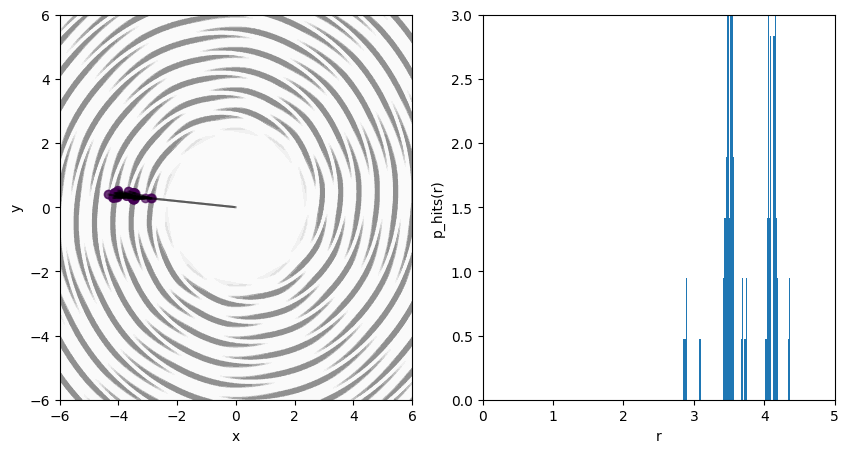

In [16]:
f,axarr = plt.subplots(1,2)
f.set_size_inches(10,5)
plot_config_and_summary_onax(axarr,2.5)